<h1> Assignment Name :- The Bike Sharing Demand Prediction Challenge</h1>
<h2>Name:- Uttam Kumar </h2><h2>Email:- 2025aa05078@wilp.bits-pilani.ac.in</h2>
<h3> Contribution :- Individual </h3>
<h3>Objective:- </h3>
<p style="text-align: justify;">This Assignment is regarding the Bike Sharing Demand Prediction Challenge, where
our goal is to predict the number of hourly bike rentals, using weather, time, and seasonal
data.After completion of excercise we will understand:
<ul><li>Learn how to analyze a real-world dataset,</li>
<li>Apply Linear Regression and its extensions,</li>
<li>Understand nonlinearity and regularization,</li>
<li>Evaluate models using a logarithmic error metric (RMSLE)</li></ul>
</p>

<p style="text-align: justify;"> 
Project Plan
Collect all important & programming dependencies to make project work smoothly, load & import required project libraries,
load & import all required training & testing data set. Know your data. collect facts & figure of data, perform Exploratory
data analysis aka EDA through examining complete dataset, identifying missing values & different features types. Try to identify
visual relationships between key features & target variables. Below are the comprehensive steps provided:-
<ol>
<li>Import project modules & libraries</li>
<li>Load training & testing data from google drive link</li>
<li>Know more about data and preprocessing</li>
<li>EDA: visualize relationship between features & target variable(output)</li>
<li>EDA: Data cleaning</li>
<li>EDA: Identify outlier with help of box & whisker plot</li>
<li>Prepare data for traning & validation sets</li>
<li>Regression Model implementation</li>
<li>Model Comparison and Interpretation</li>
<li>Final Conclusion</li>
<li>Reflection Questions - (Optional)</li></ol>
</p>

<p>Note:- Instructon are given to use sklearn libraries for this task.</p>

<h3>1. Import project modules & libraries</h3>

In [1]:
# Modules and different libraries

# General libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# basic python datetime library
from datetime import datetime
import datetime as dt

# Preprocessing related libraries
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# libraries for regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#from sklearn.pipeline import Pipeline

# for evalution and reporting related libraries
#from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

#from sklearn.model_selection import GridSearchCV

#from sklearn.exceptions import ConvergenceWarning

<h3>2. Load training and from google drive link</h3>

In [2]:
# Step for loading training from google drive link or from local path
bike_dataset = pd.read_csv('bike_train.csv', encoding ='latin')
# Loading training data, first later we can import test data for model validation

<h3>3. Know more about data and preprocessing</h3>

<h3>Q1. Examine dataset size, missing values, and feature types</h3>

In [3]:
bike_dataset.shape

(10450, 12)

In [4]:
print(f'Number of rows received in dataset: rows : {bike_dataset.shape[0]}, number of columns present in data: column: {bike_dataset.shape[1]}')

Number of rows received in dataset: rows : 10450, number of columns present in data: column: 12


In [5]:
bike_dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [6]:
bike_dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-07-15 7:00:00,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47
1,2012-08-14 15:00:00,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283
2,2011-02-06 6:00:00,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1
3,2012-05-06 17:00:02,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531
4,2012-01-09 2:00:00,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5


In [7]:
# Descibe data in respect of memory & data type with null values
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10450 non-null  object 
 1   season      10450 non-null  int64  
 2   holiday     10450 non-null  int64  
 3   workingday  10450 non-null  int64  
 4   weather     10450 non-null  int64  
 5   temp        10450 non-null  float64
 6   atemp       10450 non-null  float64
 7   humidity    10450 non-null  int64  
 8   windspeed   10450 non-null  float64
 9   casual      10450 non-null  int64  
 10  registered  10450 non-null  int64  
 11  count       10450 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 979.8+ KB


In [8]:
#Publish statical details of dataset;ie mean, mode, 5 points summaury along with qualtile details
bike_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10450.0,2.507943,1.116946,1.00,2.0000,3.00000,4.0000,4.0000
holiday,10450.0,0.028804,0.167263,0.00,0.0000,0.00000,0.0000,1.0000
workingday,10450.0,0.675694,0.468137,0.00,0.0000,1.00000,1.0000,1.0000
weather,10450.0,1.413876,0.632258,1.00,1.0000,1.00000,2.0000,4.0000
temp,10450.0,20.191700,7.792683,0.82,13.9400,20.50000,26.2400,41.0000
atemp,10450.0,23.605793,8.478045,0.76,16.6650,24.24000,31.0600,45.4550
humidity,10450.0,61.924211,19.245193,0.00,47.0000,62.00000,77.0000,100.0000
windspeed,10450.0,12.765259,8.102821,0.00,7.0015,12.45005,16.9979,56.9969
casual,10450.0,35.869091,49.629436,0.00,4.0000,16.00000,49.0000,367.0000
registered,10450.0,154.511675,150.861267,0.00,35.0000,117.00000,221.0000,886.0000


In [9]:
duplicate_counts = len(bike_dataset[bike_dataset.duplicated()])
print(f'Number of duplicate defined in given dataset: Duplicate Count: {duplicate_counts}')

Number of duplicate defined in given dataset: Duplicate Count: 0


In [10]:
print(bike_dataset.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [11]:
bike_dataset.nunique()

datetime      10450
season            4
holiday           2
workingday        2
weather           4
temp           1801
atemp          1815
humidity         92
windspeed      1676
casual          296
registered      716
count           817
dtype: int64

<p style="text-align: justify;">Q1 Ans :- After performing abover methods and checks, below are my observations on given data set.
<ul>
    <li>We have that complete dataset is 10450 which has 12 columns including target value. The dataset is a mix of integer (8 columns), float (3 columns) & date time which is in string types.</li>
    <li>Except date-time & count, the given data set contains these given columns as features as input for our model implementation. ie; 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered'.</li>
    <li>We checked and observed that there is no duplicate entry in the given dataset.While performing null & unique checks, I identified that every column has 0 null values. It seems that data are clean in nature and there are no missing values in data in any of the rows and columns.</li>
</ul>
</p>

<h3>Q2. Visualize relationships between key features and the target variable (count).</h3>

<p>By understanding of unique counts above, I have observed that there are bascailly three main categories.
<ol>
    <li>Datetime</li>
    <li>Numerical & floating values - temp ,atemp, humidity, windspeed, casual,registered</li>
    <li>Cateogical - season in 4, holiday in 2 categories, workingday in 2 categories, weather in 4 categories.</li>
</ol> 
</p>
<p>EDA: visualize relationship between features & target variable(output)</p>
<h4>Below is visualization of all numerical values in diffrent plot graphs.</h4>

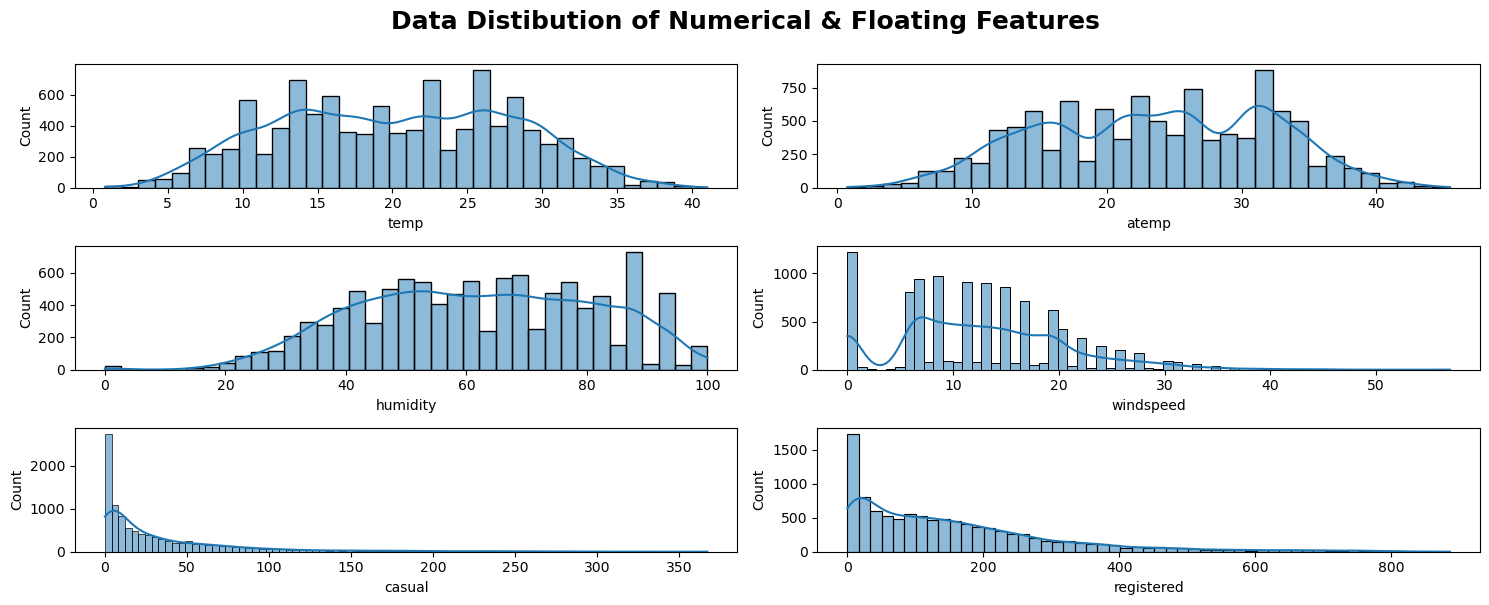

In [12]:
data_raw_features = ['temp' ,'atemp', 'humidity', 'windspeed', 'casual','registered']
# for all 6 numerical values data
plt.figure(figsize=(15,6))
plt.suptitle('Data Distibution of Numerical & Floating Features', fontsize=18, fontweight='bold', y=1.00)

for i,col in enumerate(data_raw_features):
    plt.subplot(3, 2, i+1) 
    # Distribution analysis
    sns.histplot(bike_dataset, x=col, kde=True)
    # x-axis label
    plt.xlabel(col)
    plt.tight_layout() 
plt.show()

<h3>Q3. Suggest which variables are likely to be most informative.</h3>

<p style="text-align: justify;">Data distribution of all important features & numerical respresentation of data in plot graph clearly stating that temp, atemp & humidity has normal distribution in sample set.
where in windspeed, causal & registered dataset are containing more outlier and also represnting skewness. which is clearly visiable through graph. which can be evidence through wishky-plot graph.</p>
    <h4>EDA: Identify outlier with help of box & whisker plot</h4>

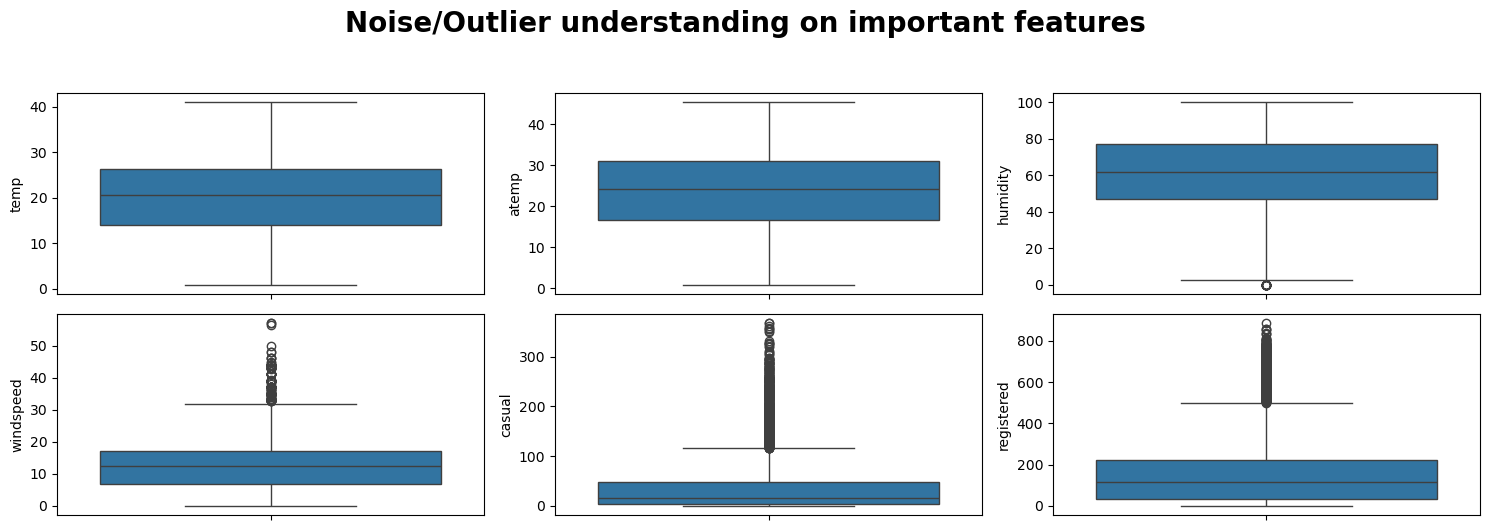

In [13]:
def outlier_visuals():
    # figure size
    plt.figure(figsize=(15,5))
    # title
    plt.suptitle('Noise/Outlier understanding on important features', fontsize=20, fontweight='bold', y=1.05)
    
    for i,col in enumerate(data_raw_features):
      plt.subplot(2,3, i+1)
      sns.boxplot(bike_dataset[col])
      plt.tight_layout()
    plt.show()

outlier_visuals()

<p style="text-align: justify;">Understanding: </br>
Outliers are visible in the 'windspeed', 'casual' and 'registred' columns. As per given dataset we have fixed set of datapoint 
hence we are not dropping any outlier but we can treat through clipping method. </p>
<p>EDA: Data cleaning</p>

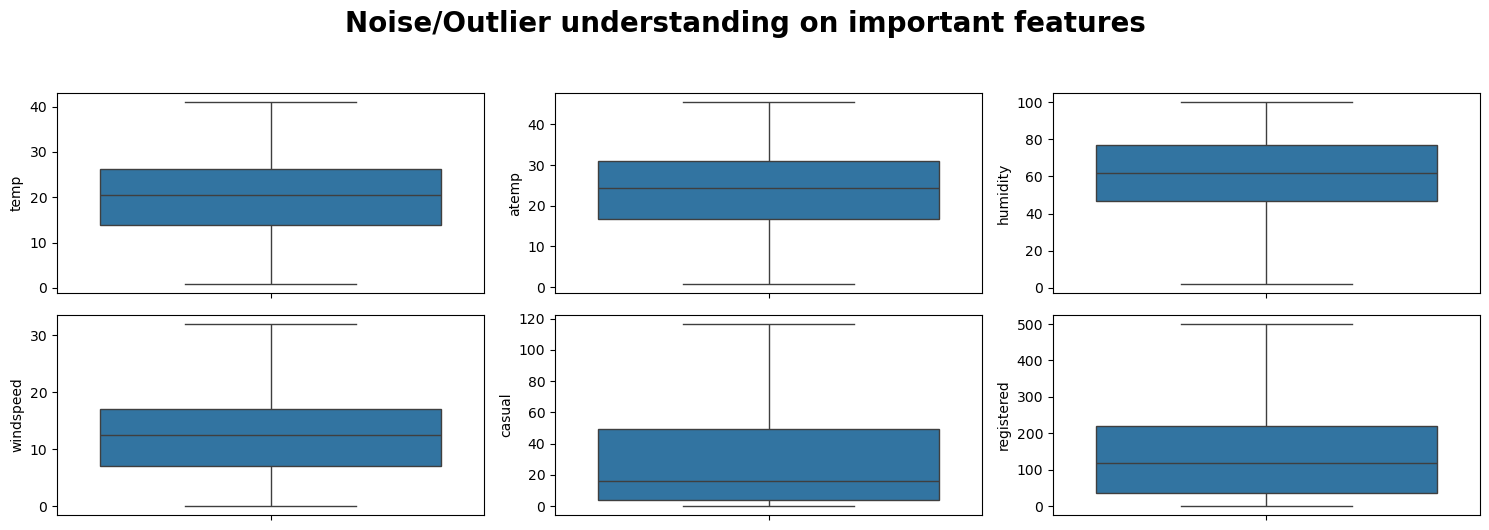

In [14]:
def treat_outliers(dataset):
    for col in dataset[data_raw_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = dataset[col].quantile(0.25)
        q3 = dataset[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        dataset[col] = dataset[col].clip(lower_bound, upper_bound)
    return dataset
bike_dataset = treat_outliers(bike_dataset)
outlier_visuals()

<h5>Feature Engineering - (Optional hints to improve performance)</h5>
<h5><b>Q4. You can try to derive features from datetime (hour, weekday, month, season), encodecategorical variables, consider transformations to capture nonlinear trends to improve</b></h5>

In [15]:
# Let's Set Polynomial degree for future use.
poly_degree = 2

# Convert timestamp to datetime
bike_dataset['datetime'] = pd.to_datetime(bike_dataset['datetime'])

# Extracting features
bike_dataset['month'] = bike_dataset['datetime'].dt.month
bike_dataset['day'] = bike_dataset['datetime'].dt.day
bike_dataset['hour'] = bike_dataset['datetime'].dt.hour
bike_dataset['days_of_year'] = bike_dataset['datetime'].dt.dayofyear
bike_dataset['weekday'] = bike_dataset['datetime'].dt.weekday
bike_dataset['is_weekend'] = (bike_dataset['weekday'] >= 5).astype(int)

<p>After implementation of date time based feature, I obervered that these are repetative sequence along with cycle quality,
hence below can be assume by added new feature and have to generate time series based sin & cos feature which will support our liner regression
model performance. ie;
<ul>
<li> Hour -> 23 -> 0 </li>
<li> Weekday -> Sun -> Mon</li>
<li>Is it 'Peak Hour' ?</li>
</ul></p>

In [16]:
bike_dataset['month_sin'] = np.sin(2 * np.pi * bike_dataset['month'] / 12)
bike_dataset['month_cos'] = np.cos(2 * np.pi * bike_dataset['month'] / 12)

bike_dataset['day_sin'] = np.sin(2 * np.pi * bike_dataset['day'] / 24)
bike_dataset['day_cos'] = np.cos(2 * np.pi * bike_dataset['day'] / 24)

bike_dataset['hour_sin'] = np.sin(2 * np.pi * bike_dataset['hour'] / 24)
bike_dataset['hour_cos'] = np.cos(2 * np.pi * bike_dataset['hour'] / 24)

days_in_year = bike_dataset['datetime'].dt.is_leap_year.map({True: 366, False: 365})
bike_dataset['year_sin'] = np.sin(2 * np.pi * bike_dataset['days_of_year'] / days_in_year)
bike_dataset['year_cos'] = np.cos(2 * np.pi * bike_dataset['days_of_year'] / days_in_year)

bike_dataset['weekday_sin'] = np.sin(2 * np.pi * bike_dataset['weekday'] / 7)
bike_dataset['weekday_cos'] = np.cos(2 * np.pi * bike_dataset['weekday'] / 7)

bike_dataset['is_peak_hour'] = bike_dataset['hour'].isin([7, 8, 9, 17, 18, 19]).astype(int)

bike_dataset['hour_x_temp'] = bike_dataset['hour'] * bike_dataset['temp']

<p>Couple of improvment which I understood while learning from other source and error while executing this code, <br/> 
1.) breaking code for datetime column <br/> 2.) Need to address model data leakge
</p>

In [17]:
weather_dummies = pd.get_dummies(bike_dataset['weather'],prefix='weather')
bike_dataset = pd.concat([bike_dataset, weather_dummies], axis=1) 

# Address model data leakage
bike_dataset = bike_dataset.drop(["weather", "casual", "registered"], axis=1)

<h4>Q5. Split data into training and validation sets and build a simple Linear Regression model.</h4>
<p>Prepare data for traning & validation sets</p>

In [18]:
## Import the dataset for training and validaiton
X = bike_dataset.drop(['datetime','count'], axis=1)

# Not include target in training of model
Y= bike_dataset['count']

X.info()

# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        10450 non-null  int64  
 1   holiday       10450 non-null  int64  
 2   workingday    10450 non-null  int64  
 3   temp          10450 non-null  float64
 4   atemp         10450 non-null  float64
 5   humidity      10450 non-null  int64  
 6   windspeed     10450 non-null  float64
 7   month         10450 non-null  int32  
 8   day           10450 non-null  int32  
 9   hour          10450 non-null  int32  
 10  days_of_year  10450 non-null  int32  
 11  weekday       10450 non-null  int32  
 12  is_weekend    10450 non-null  int64  
 13  month_sin     10450 non-null  float64
 14  month_cos     10450 non-null  float64
 15  day_sin       10450 non-null  float64
 16  day_cos       10450 non-null  float64
 17  hour_sin      10450 non-null  float64
 18  hour_cos      10450 non-nu

In [19]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Performed Scaler on Feature
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print('Displaying size of total rows for each training & test datasets.')
print(X_train_poly.shape)
print(X_test_poly.shape)

Displaying size of total rows for each training & test datasets.
(8360, 464)
(2090, 464)


<h4> Q6. To improve model performance, you may try to:</h4>
<p><b>
<ul><li>Extend feature space using polynomial transformations (degree 2 or 3)</li>
    <li>Apply Ridge and Lasso regression on polynomial features, Tune the regularization
strength (α).</li>
</b></p>

In [20]:
ridge_alpha = [0.01, 0.1, 1, 5, 10, 50, 100, 200]
lasso_alpha = [0.0001, 0.001, 0.01, 0.1, 1, 5]
net_alpha = [0.0001, 0.001, 0.01, 0.1, 1]

# RMSLE function
def do_rmsle(Y_true, Y_pred):
    y_pred = np.maximum(0, Y_pred)
    y_true = np.maximum(0, Y_true)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

def evaluate_model(name, model, X_train, X_test, Y_train, Y_test, results):
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(Y_test, preds)
    r2 = r2_score(Y_test, preds)
    rmsle = do_rmsle(Y_test, np.maximum(preds, 0))

    results.append([name, r2, rmse, rmsle, model])

results = []

evaluate_model("Linear Regression", LinearRegression(), 
               X_train_poly, X_test_poly, Y_train, Y_test, results)

for a in ridge_alpha:
    evaluate_model(f"Ridge α={a}", Ridge(alpha=a), 
                   X_train_poly, X_test_poly, Y_train, Y_test, results)

for a in lasso_alpha:
    evaluate_model(f"Lasso α={a}", Lasso(alpha=a, max_iter=10000), 
                   X_train_poly, X_test_poly, Y_train, Y_test, results)

for a in net_alpha:
    for r in [0.1, 0.3, 0.5]:
        evaluate_model(f"ElasticNet α={a}", ElasticNet(alpha=a, l1_ratio=r, max_iter=10000), 
                       X_train_poly, X_test_poly, Y_train, Y_test, results)

df_results = pd.DataFrame(results, columns=['Name','R2','RMSE','RMSLE', 'Model'])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e+07, tolerance: 2.793e+04
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+07, tolerance: 2.793e+04
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+07, toler

<h4>Q7. Summarize all results (of different models tried out) in one table (RMSLE, key
observations)</h4>

In [21]:
print('='*80)
print(df_results[['Name','R2', 'RMSE', 'RMSLE']])
print('='*80)

                   Name        R2         RMSE     RMSLE
0     Linear Regression  0.847627  4590.659325  1.050984
1          Ridge α=0.01  0.842858  4734.322141  1.037977
2           Ridge α=0.1  0.835106  4967.874498  1.020316
3             Ridge α=1  0.802220  5958.663541  1.000806
4             Ridge α=5  0.783053  6536.119295  0.995016
5            Ridge α=10  0.778560  6671.502793  0.987528
6            Ridge α=50  0.771573  6882.003427  0.981207
7           Ridge α=100  0.768987  6959.888613  0.981649
8           Ridge α=200  0.766667  7029.800359  0.973396
9        Lasso α=0.0001  0.819989  5423.339361  1.031615
10        Lasso α=0.001  0.819527  5437.232488  1.028750
11         Lasso α=0.01  0.814355  5593.063869  1.008391
12          Lasso α=0.1  0.774980  6779.347196  0.973873
13            Lasso α=1  0.757032  7320.078663  0.958307
14            Lasso α=5  0.727415  8212.371136  0.974061
15  ElasticNet α=0.0001  0.805235  5867.841091  1.004637
16  ElasticNet α=0.0001  0.8081

In [22]:
#best_model_df = df_results.sort_values(by='RMSLE', ascending=True)
best_model_df=df_results.sort_index()
#print(best_model_df.iloc[26])
best_name = best_model_df.iloc[26]
best_name

Name                          ElasticNet α=0.1
R2                                    0.763759
RMSE                               7117.413461
RMSLE                                  0.96712
Model    ElasticNet(alpha=0.1, max_iter=10000)
Name: 26, dtype: object

<p>Note:- I am considering my best model based on RMSLE values where in ElasticNet with Alpha 0.1 working fine with respective penalize which also put lower counts on over-predicting. Even I have liner regression which tends to overpredict small values once RMSLE decreases.</p>

<h4>Q8. Plot residuals for the best model.</h4>

ElasticNet(alpha=0.1, max_iter=10000)


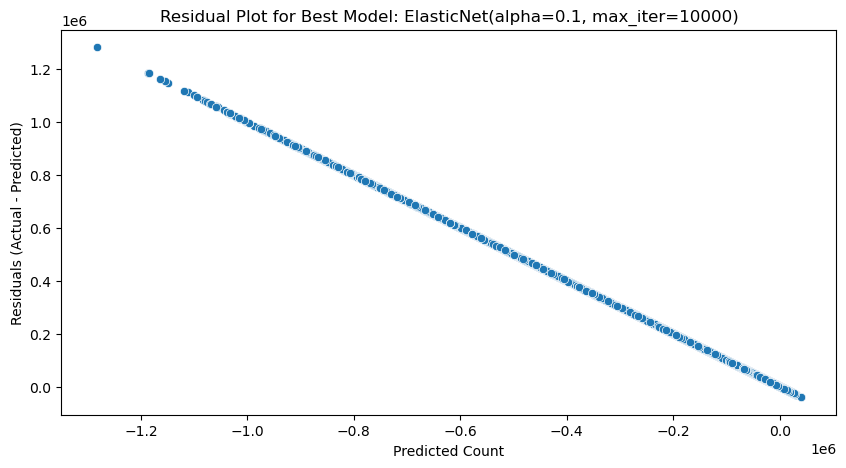

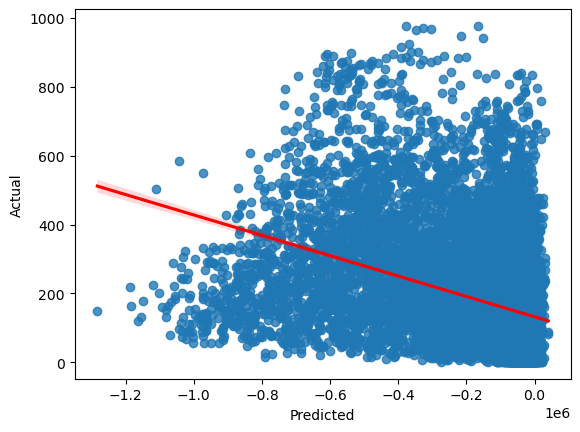

In [23]:
best_model = None
best_name = best_name['Name']

if "Ridge" in best_name:
    alpha = float(best_name.split('=')[1])
    best_model = Ridge(alpha=alpha)
elif "Lasso" in best_name:
    alpha = float(best_name.split('=')[1])
    best_model = Lasso(alpha=alpha, max_iter=10000)
elif "ElasticNet" in best_name:
    alpha = float(best_name.split('=')[1])
    best_model = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)
#else:
 #   best_model = LinearRegression()
print(best_model)
print('='*20)
best_model.fit(X_train_poly, Y_train)

X_poly_full = poly.fit_transform(X)
pred_full = best_model.predict(X_poly_full)

# Residuals
residuals = Y - pred_full

plt.figure(figsize=(10,5))
sns.scatterplot(x=pred_full, y=residuals)
plt.xlabel("Predicted Count")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"Residual Plot for Best Model: {best_model}")
plt.show()

# graph --> best fit line on test data
sns.regplot(x=pred_full, y=Y, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
test = pd.read_csv("bike_test.csv")
test['datetime'] = pd.to_datetime(test['datetime'],dayfirst=True)

# Same feature engineering as training
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['days_of_year'] = test['datetime'].dt.dayofyear
test['weekday'] = test['datetime'].dt.weekday
test['is_weekend'] = (test['weekday'] >= 5).astype(int)
test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12)
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)
test['day_sin'] = np.sin(2 * np.pi * test['day'] / 24)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 24)
test['hour_sin'] = np.sin(2 * np.pi * test['hour'] / 24)
test['hour_cos'] = np.cos(2 * np.pi * test['hour'] / 24)
days_in_year = test['datetime'].dt.is_leap_year.map({True: 366, False: 365})
test['year_sin'] = np.sin(2 * np.pi * test['days_of_year'] / days_in_year)
test['year_cos'] = np.cos(2 * np.pi * test['days_of_year'] / days_in_year)
test['weekday_sin'] = np.sin(2 * np.pi * test['weekday'] / 7)
test['weekday_cos'] = np.cos(2 * np.pi * test['weekday'] / 7)
test['is_peak_hour'] = test['hour'].isin([7, 8, 9, 17, 18, 19]).astype(int)
test['hour_x_temp'] = test['hour'] * test['temp']
weather_dummies_test = pd.get_dummies(test['weather'],prefix='weather')
test = pd.concat([test, weather_dummies_test], axis=1) 

## Import the dataset for training and validaiton
X_test = test.drop(['datetime'], axis=1)

X_test.info()

#Performed Scaler on Feature
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_test_poly = poly.fit_transform(X_test)

print('='*20)
print('Displaying size of total rows for each validation.')
print(X_test_poly.shape)
print('='*20)

test['count_predicted'] = best_model.predict(X_test_poly).clip(0)
print('='*20)
test.shape
print('='*20)

# CSV for submission
test[['datetime', 'count_predicted']].to_csv("submission.csv", index=False)
print("submission.csv is ready!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        2613 non-null   int64  
 1   holiday       2613 non-null   int64  
 2   workingday    2613 non-null   int64  
 3   weather       2613 non-null   int64  
 4   temp          2613 non-null   float64
 5   atemp         2613 non-null   float64
 6   humidity      2613 non-null   int64  
 7   windspeed     2613 non-null   float64
 8   month         2613 non-null   int32  
 9   day           2613 non-null   int32  
 10  hour          2613 non-null   int32  
 11  days_of_year  2613 non-null   int32  
 12  weekday       2613 non-null   int32  
 13  is_weekend    2613 non-null   int64  
 14  month_sin     2613 non-null   float64
 15  month_cos     2613 non-null   float64
 16  day_sin       2613 non-null   float64
 17  day_cos       2613 non-null   float64
 18  hour_sin      2613 non-null 

<h4>Q9. Explain why the winning model performs better.</h4>

<p style="text-align: justify;">In my case, I tried linear regression model along with different regularization models such as Ridge, Lasso & Elastic Net along with different tunning parameters such as alpha & ratio. as per my experiment my winning model is Linear regress model which predication is closest to real values with high accuracy. This also brings best general performance.

If you might have observed that Lass model with learning rate alpha 0.01 has produced good RMSLE value but performed poorly overall. This produces low R2 value which means it will loss accuracy and increase RMSE value which will become underfitted. 

<h4>Linear Regression</h4>
<ul>
    <li>R² = 0.8228 (highest)</li>
    <li>RMSE = 5339 (lowest)</li>
    <li>RMSLE = (okay)</li>
</ul>
</p>


<h4>Q10. Why does RMSLE penalize under-predictions more gently than RMSE ?</h4>
<p>
if we refer main formula of RMSE  which is sqrt(mean((y_true – y_pred)²)) which talks about square of the difference and if the difference number are higher then penalty will be on high side, and on other hand if you see main formule of RMSLE = sqrt(mean((log(y_true+1) – log(y_pred+1))²)) which again talks on logs which means big values numbers are getting shrink and differences will be become smaller. 

That is why RMSLE penalizes under-predictions more gently, because log reduces the gap between the real and predicted numbers.
</p>

<h4>Q11. What are the trade-offs between model simplicity and predictive power?</h4>
<p>As per understanding, simple models are easy for understanding and implementation where in complex models are hard to understanding and in implementation. The second factor is training time, which is fast in simple models & and slow in complex models. Based on question, predictive powers are much higher in complex models where in it is low in simple models. Initial stage walks through from simple to complex model selection, best on business use case, enginerring prefer models based on performace vs accuracy.
</p>

<h4>Q12. Why can’t Linear Regression alone capture time-of-day effects effectively?</h4>
<p>Linear Regression models learn and understand datetime factors such as hour as a number but hour is actually a cycle 
which means a daily repeating pattern kind of. 
Here our model Linear Regression alone fails because it cannot predict 
i.) cyclic patterns, 
ii.) waves/peaks/dips
iii.)to Capture daily periodicity
</p>